Scoprite Kaggle e confrontatevi sulla piattaforma, vi invito ad esplorarla per bene in quanto punto di riferimento per il machine learning e ai moderna

kaggle.com

Provare ad analizzare tutti insieme un nuovo set di dati:

https://www.kaggle.com/competitions/playground-series-s4e10/code

C’è anche una sezione con I risultati di alcuni utenti e il loro codice, provate a scoprire se ci sono dei passaggi interessati per quanto riguarda l’analisi e aggiungeteli al vostro foglio con le funzioni di analisi

Sempre prendendo spunto dai risultati di altri utenti provarte a creare un modello di machine learning e a mettere il risultato dell’analisi su kaggle… vi restituirà un punteggio in base al quale verrete posizionati in una classifica sull’argomento

Inviare un solo file jupyter (rappresentativo della classe) con codice, analisi e commento sempre a mbagnoli999@gmail.com

In [2]:
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('train.csv')

print("\nInformazioni Data Frame\n\n")

display(df.info())


Informazioni Data Frame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: f

None

In [3]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [4]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
df[df["cb_person_default_on_file"]== "Y"]["cb_person_default_on_file"].count()

df[df["cb_person_default_on_file"]== "N"]["cb_person_default_on_file"].count()

df[df["cb_person_cred_hist_length"] == 2]["cb_person_cred_hist_length"].count()

np.int64(10657)

In [6]:
#Neumerical Columns
num_col = df.select_dtypes(exclude='object').columns
#Categorical Columns
cat_col = df.select_dtypes(include='object').columns

KeyboardInterrupt: 

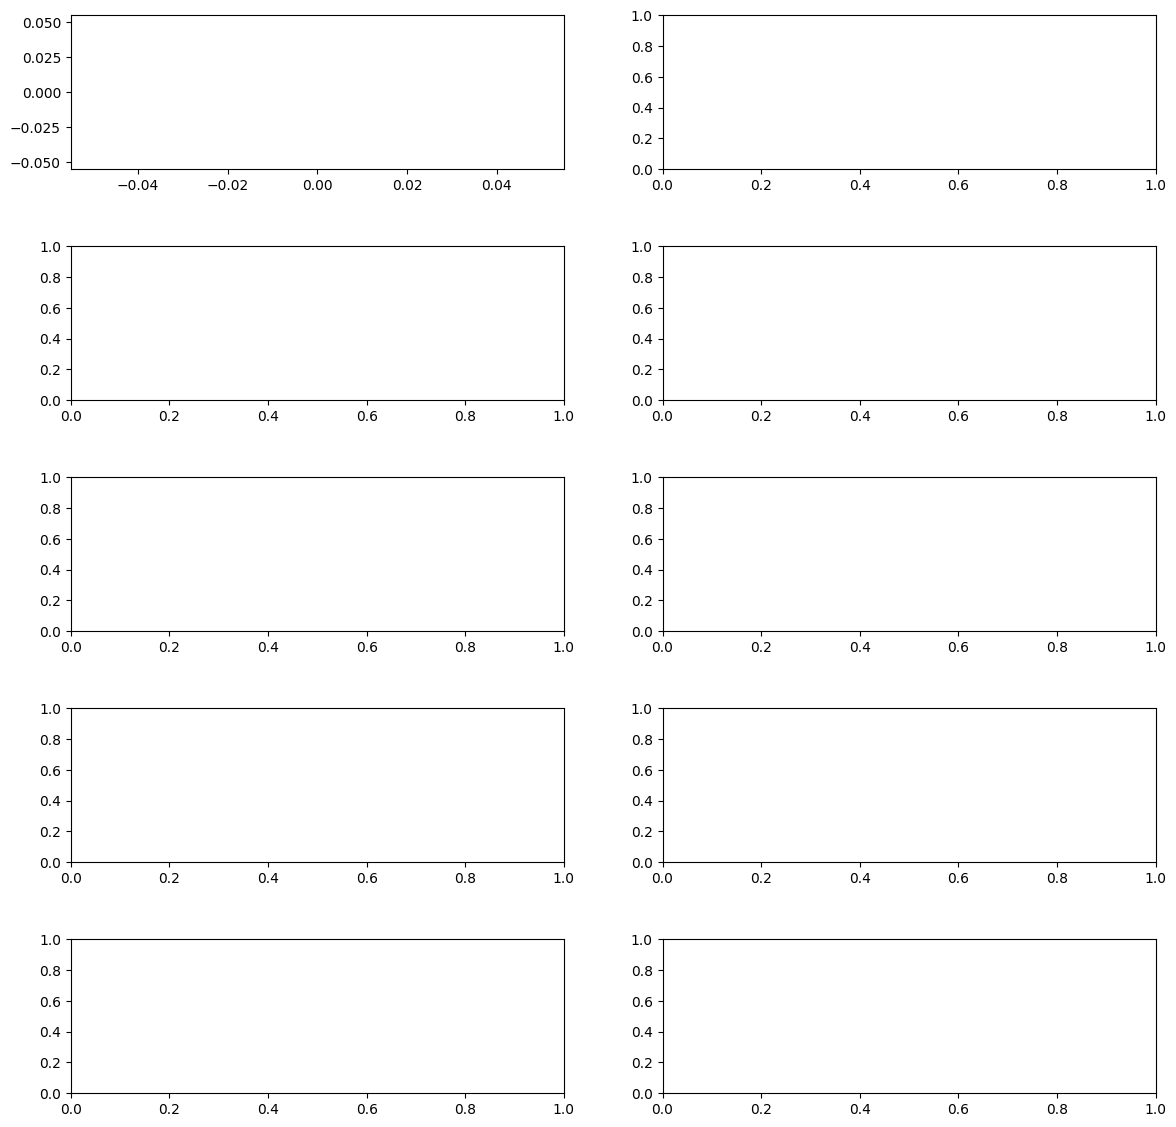

In [7]:
#For neumeric feature
fig,axes = plt.subplots(math.ceil(len(num_col.values)/2),2,figsize=(14,14))
plt.subplots_adjust(hspace=0.5)

#Plot the histogram for all neumeric columns

for idx, col in enumerate(num_col):
    x = idx//2
    y = idx%2
    sns.histplot(df[col],kde=True,ax=axes[x,y])
    axes[x, y].set_title(f'Distribution of {col}')
    axes[x, y].set_xlabel(col)
    axes[x, y].set_ylabel('Count')
plt.show()

In [ ]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [ ]:
#['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for el in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
    print("el: ", df[el].nunique())

el:  4
el:  6
el:  7
el:  2


In [ ]:
#Proviamo a modificare la funzione di ieri:

def analyze_and_plot_fixed(dataframe, group_col, base_path):
    # Lista per DataFrame filtrati e correlazioni
    filtered_corr_list = []
    
    # Valori unici della colonna
    unique_values = dataframe[group_col].unique()
    
    for value in unique_values:
        # Filtra il DataFrame
        df_filtered = dataframe[dataframe[group_col] == value]
        
        if df_filtered.empty:
            continue  # Salta se il DataFrame è vuoto
        
        # Nome del gruppo
        group_name = str(df_filtered[group_col].iloc[0]).replace("/", "-")  # Gestione di caratteri speciali
        
        # Rimuovi le colonne non necessarie
        df_cleaned = df_filtered.drop(['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis=1, errors='ignore')
        
        # Calcola la matrice di correlazione
        corr_matrix = df_cleaned.corr()
        
        # Filtra correlazioni significative
        filtered = corr_matrix.where(((corr_matrix > 0.3) | (corr_matrix < -0.3)) & (corr_matrix != 1)).stack()
        filtered_corr_list.append((f'{group_col} name: {group_name}\n', filtered))
        
        # Crea la directory per salvare le immagini
        save_path = os.path.join(base_path, group_col)
        os.makedirs(save_path, exist_ok=True)
        
        # Plotta la heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title(f'Heatmap for {group_col}: {group_name}')
        
        # Salva il grafico
        plt.savefig(f'{save_path}/{group_name}_heatmap.png', bbox_inches='tight')
        plt.close()  # Chiudi il grafico per evitare conflitti
        
    return filtered_corr_list


base_path = './image'
filtered_corr_home_own = analyze_and_plot_fixed(df, 'person_home_ownership', base_path)
filtered_corr_loan_intent = analyze_and_plot_fixed(df, 'loan_intent', base_path)
#['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
filtered_corr_loan_grade = analyze_and_plot_fixed(df, 'loan_grade', base_path)
filtered_corr_cb_default = analyze_and_plot_fixed(df, 'cb_person_default_on_file', base_path)

In [ ]:
corr_filtrate = [filtered_corr_home_own, filtered_corr_loan_intent, filtered_corr_loan_grade, filtered_corr_cb_default]
for el in corr_filtrate:
    display(el)

[('person_home_ownership name: RENT\n',
  person_age                  cb_person_cred_hist_length    0.880210
  person_income               loan_amnt                     0.323939
  loan_amnt                   person_income                 0.323939
                              loan_percent_income           0.682919
  loan_int_rate               loan_status                   0.335683
  loan_percent_income         loan_amnt                     0.682919
                              loan_status                   0.478472
  cb_person_cred_hist_length  person_age                    0.880210
  loan_status                 loan_int_rate                 0.335683
                              loan_percent_income           0.478472
  dtype: float64),
 ('person_home_ownership name: OWN\n',
  person_age                  cb_person_cred_hist_length    0.876507
  person_income               loan_amnt                     0.327054
  loan_amnt                   person_income                 0.327054
     

[('loan_intent name: EDUCATION\n',
  person_age                  cb_person_cred_hist_length    0.871835
  loan_amnt                   loan_percent_income           0.666378
  loan_percent_income         loan_amnt                     0.666378
                              loan_status                   0.391602
  cb_person_cred_hist_length  person_age                    0.871835
  loan_status                 loan_percent_income           0.391602
  dtype: float64),
 ('loan_intent name: MEDICAL\n',
  person_age                  cb_person_cred_hist_length    0.864460
  person_income               loan_amnt                     0.345332
  loan_amnt                   person_income                 0.345332
                              loan_percent_income           0.635994
  loan_int_rate               loan_status                   0.425486
  loan_percent_income         loan_amnt                     0.635994
                              loan_status                   0.386196
  cb_person_cred

[('loan_grade name: B\n',
  person_age                  cb_person_cred_hist_length    0.867246
  person_income               loan_amnt                     0.345566
  loan_amnt                   person_income                 0.345566
                              loan_percent_income           0.645358
  loan_percent_income         loan_amnt                     0.645358
                              loan_status                   0.425778
  cb_person_cred_hist_length  person_age                    0.867246
  loan_status                 loan_percent_income           0.425778
  dtype: float64),
 ('loan_grade name: C\n',
  person_age                  cb_person_cred_hist_length    0.881290
  person_income               loan_amnt                     0.332421
  loan_amnt                   person_income                 0.332421
                              loan_percent_income           0.637176
  loan_percent_income         loan_amnt                     0.637176
                              lo

[('cb_person_default_on_file name: N\n',
  person_age                  cb_person_cred_hist_length    0.872540
  person_income               loan_amnt                     0.308694
  loan_amnt                   person_income                 0.308694
                              loan_percent_income           0.645385
  loan_percent_income         loan_amnt                     0.645385
                              loan_status                   0.394581
  cb_person_cred_hist_length  person_age                    0.872540
  loan_status                 loan_percent_income           0.394581
  dtype: float64),
 ('cb_person_default_on_file name: Y\n',
  person_age                  cb_person_cred_hist_length    0.883738
  person_income               loan_amnt                     0.330058
  loan_amnt                   person_income                 0.330058
                              loan_percent_income           0.656406
  loan_int_rate               loan_status                   0.357793
  

In [ ]:

def corr_comuni(filtered_corr_list,nome_lista):

    correlation_dict = {}

    for group_info, filtered_corr in filtered_corr_list:
        group_name = group_info.strip()
        for (col1, col2), value in filtered_corr.items():
            pair = tuple(sorted([col1, col2]))
            correlation_dict.setdefault(pair, set()).add(group_name)

    #Filtra le coppie presenti in almeno 2 elementi unici della colonna
    relevant_correlations = {pair: names for pair, names in correlation_dict.items() if len(names) >= 2}

    #Stampa i risultati
    print(f"Correlazioni presenti in 2 o più {nome_lista}:")
    for pair, names in relevant_correlations.items():
        print(f"{pair}: presenti in {len(names)} {nome_lista} -> {', '.join(names)}")

    return relevant_correlations

#['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
#[filtered_corr_home_own, filtered_corr_loan_intent, filtered_corr_loan_grade, filtered_corr_cb_default]

relevant_correlations_status = corr_comuni(filtered_corr_home_own,"person_home_ownership")
print("\n\n---------------------\n\n")
relevant_correlations_adult = corr_comuni(filtered_corr_loan_intent, "loan_intent")
print("\n\n---------------------\n\n")
relevant_correlations_adult = corr_comuni(filtered_corr_loan_grade, "loan_grade")
print("\n\n---------------------\n\n")
relevant_correlations_adult = corr_comuni(filtered_corr_cb_default, "cb_person_default_on_file")



Correlazioni presenti in 2 o più person_home_ownership:
('cb_person_cred_hist_length', 'person_age'): presenti in 4 person_home_ownership -> person_home_ownership name: OTHER, person_home_ownership name: MORTGAGE, person_home_ownership name: RENT, person_home_ownership name: OWN
('loan_amnt', 'person_income'): presenti in 3 person_home_ownership -> person_home_ownership name: OTHER, person_home_ownership name: RENT, person_home_ownership name: OWN
('loan_amnt', 'loan_percent_income'): presenti in 4 person_home_ownership -> person_home_ownership name: OTHER, person_home_ownership name: MORTGAGE, person_home_ownership name: RENT, person_home_ownership name: OWN
('loan_int_rate', 'loan_status'): presenti in 3 person_home_ownership -> person_home_ownership name: MORTGAGE, person_home_ownership name: RENT, person_home_ownership name: OTHER
('loan_percent_income', 'loan_status'): presenti in 2 person_home_ownership -> person_home_ownership name: RENT, person_home_ownership name: OTHER


----

In [ ]:
df["lone_intent"].unique()

NameError: name 'df' is not defined

In [ ]:
df['cut_età'] = pd.cut(df['person_age'], bins=[20, 25, 30, 35, 40, 60, 125], labels=['eta1', 'eta2', 'eta3', 'eta4','eta5','eta6'])

df['cut_età'].head()

0    eta4
1    eta1
2    eta2
3    eta2
4    eta1
Name: cut_età, dtype: category
Categories (6, object): ['eta1' < 'eta2' < 'eta3' < 'eta4' < 'eta5' < 'eta6']

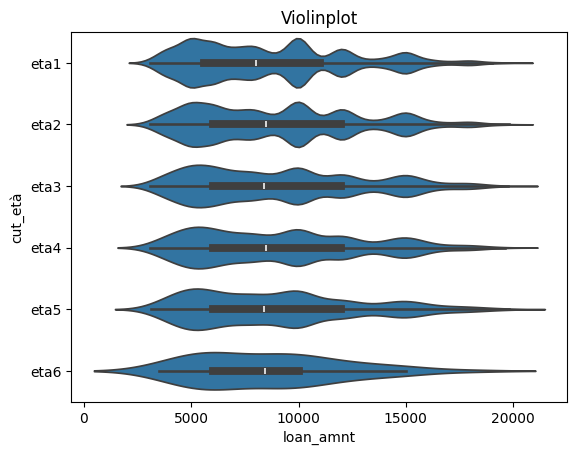

In [ ]:
sns.violinplot(data=df[(df["loan_amnt"] < 20000) & (df["loan_amnt"] > 3000) ], y='cut_età', x='loan_amnt')
plt.title("Violinplot")
plt.show()

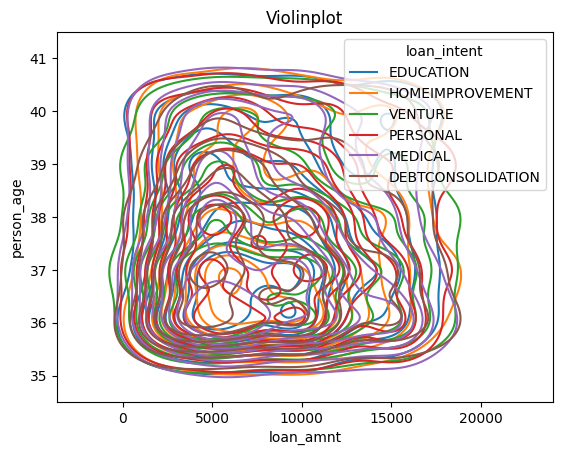

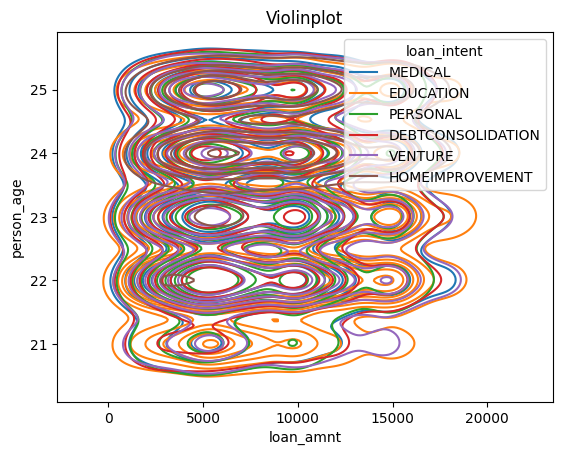

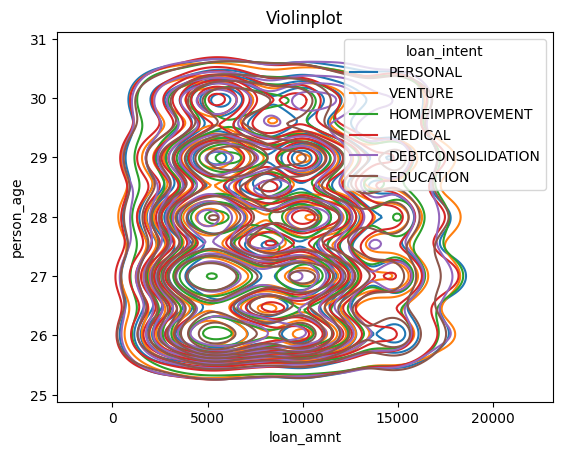

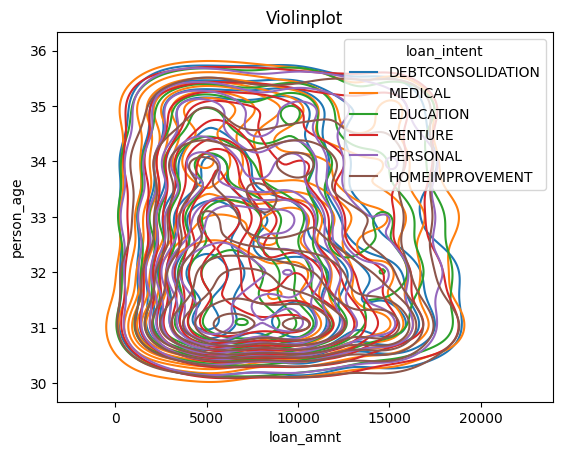

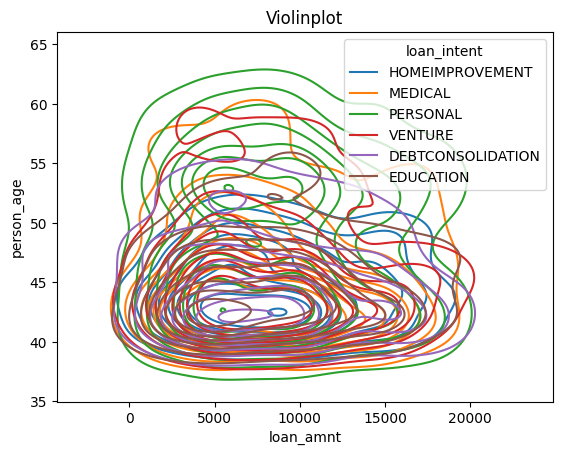

C:\Users\stefano\AppData\Local\Temp\ipykernel_10668\3251088815.py:2: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[(df["cut_età"] == cut_età) & (df["loan_amnt"] <20000) ], y='person_age', x='loan_amnt', hue = 'loan_intent')


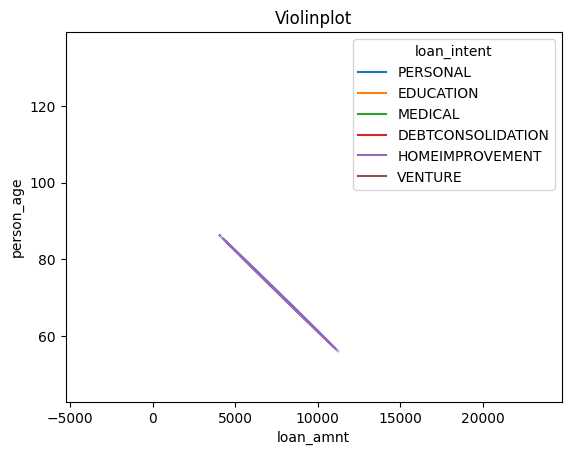

IndexError: cannot do a non-empty take from an empty axes.

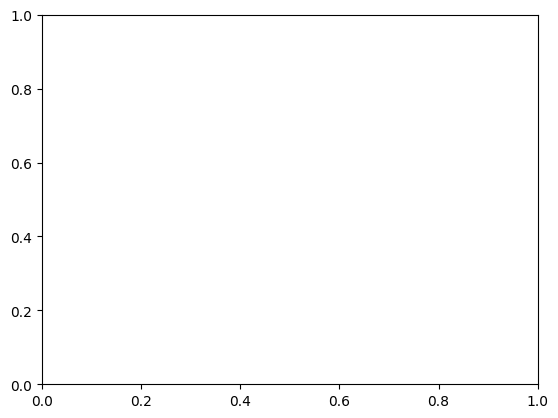

In [ ]:
# for cut_età in df['cut_età'].unique():
#     sns.kdeplot(data=df[(df["cut_età"] == cut_età) & (df["loan_amnt"] <20000) ], y='person_age', x='loan_amnt', hue = 'loan_intent')
#     plt.title("Violinplot")
#     plt.show()

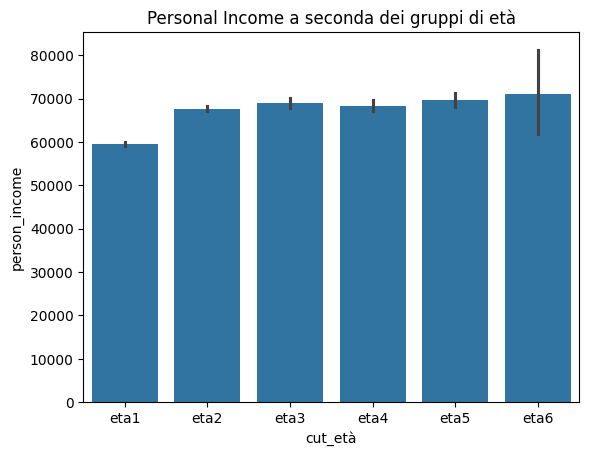

In [ ]:
sns.barplot(data=df, x='cut_età', y='person_income')
plt.title('Personal Income a seconda dei gruppi di età')
plt.show()

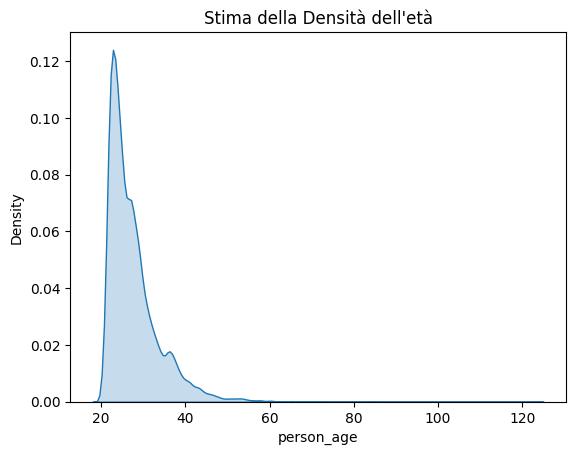

In [ ]:
sns.kdeplot(data=df, x='person_age', fill=True)
plt.title("Stima della Densità dell'età")
plt.show()

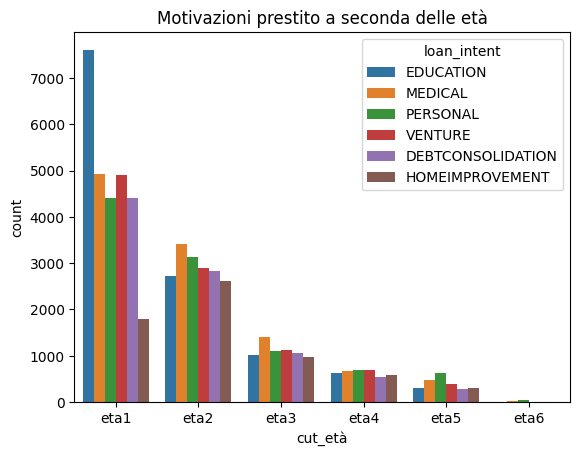

In [ ]:
sns.countplot(data=df, x='cut_età', hue='loan_intent')
plt.title('Motivazioni prestito a seconda delle età')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
print(output)
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")